# Проект "A/B-тест воронки интернет-магазина"

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-задачи-исследования" data-toc-modified-id="Цели-и-задачи-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и задачи исследования</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных-в-соотвествии-с-ТЗ" data-toc-modified-id="Подготовка-данных-в-соотвествии-с-ТЗ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных в соотвествии с ТЗ</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных-после-очистки" data-toc-modified-id="Обзор-данных-после-очистки-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Обзор данных после очистки</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Построение-воронок-и-проверка-гипотез" data-toc-modified-id="Построение-воронок-и-проверка-гипотез-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Построение воронок и проверка гипотез</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Цели и задачи исследования

**Цель исследования:**  
Для оценки влияния новой рекомендательной системы интернет-магазина на пользователей запущен A/B-тест. Необходимо загрузить данные теста, оценить корректность его проведения и проанализировать полученные результаты. В распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.
 
**Техническое задание**:  
- Название теста: recommender_system_test;
- Группы: А (контрольная), B (новая платёжная воронка);
- Дата запуска: 2020-12-07;
- Дата остановки набора новых пользователей: 2020-12-21;
- Дата остановки: 2021-01-04;
- Аудитория: 15% новых пользователей из региона EU;
- Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- Ожидаемое количество участников теста: 6000.
- Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие product_page
    - просмотры корзины — product_cart
    - покупки — purchase.


**Рабочие файлы**:  
- `ab_project_marketing_events.csv` - датасет с маркетинговыми событиями
- `final_ab_new_users.csv` - датасет с регистрациями пользователей
- `final_ab_events.csv` - датасет с событиями пользователей
- `final_ab_participants.csv` - датасет с участниками тестов

**Инструменты**:  
- Yupyter Notebook (Anaconda 2.3.2, Python 3.9.13)
    - Локальное окружение [da_practicum_env.yml](https://code.s3.yandex.net/data-analyst/da_practicum_env.yml)
    - Расширение toc2 для Jupyter Notebook
- Библиотеки Python:
    - pandas 1.2.4
    - numpy 1.20.1
    - scipy 1.8.0
    - matplotlib 3.3.4
    - seaborn 0.11.1
    - plotly 5.4.0


**Ход исследования**:   
Исследование пройдет в 3 этапа:
1. **Загрузка, обзор и подготовка данных** - Ознакомимся с данными и подготовим их к анализу
2. **Исследовательский анализ данных** - Сделаем обзорный анализ данных
3. **Проверка гипотез** - Проведем стат. тесты и сделаем выводы

## Описание данных

Файл **ab_project_marketing_events.csv** — календарь маркетинговых событий на 2020 год:
  
- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

Файл **final_ab_new_users.csv** — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года:
- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

Файл **final_ab_events.csv** — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года:
- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время события;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.

Файл **final_ab_participants.csv** — таблица участников тестов:
- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.

## Загрузка и обзор данных

Импортируем библиотеки

In [1]:
# библиотеки анализа данных
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth

# библиотеки визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

# прочие библиотеки
from datetime import datetime, timedelta
import warnings

In [2]:
# отключим UserWarning
warnings.filterwarnings('ignore')

Загружаем данные.  
*Внимание: датасеты защищены авторским правом Яндекс Практикума и не приложены к проекту.*

In [3]:
# функция для открытия csv-файла с запасным путем
def open_csv(path_1,name_file_1,path_2,name_file_2):
    way_1 = path_1 + name_file_1
    way_2 = path_2 + name_file_2
    try:
        df = pd.read_csv(way_1)
        print('Файл \033[1m' + name_file_1 + 
              '\033[0m успешно прочитан по локальному пути')
    except:
        try:
            df = pd.read_csv(way_2)
            print('Файл \033[1m' + name_file_2 + 
                  '\033[0m успешно прочитан по сетевому пути')
        except:
            return print('Ошибка чтения файла \033[1m' 
                         + name_file_2 + '\033[0m')
    return df

In [4]:
# загружаем датасет с маркетинговыми активностями
path_local = ''
name_file_local = 'ab_project_marketing_events.csv'
path_web = ''
name_file_web = 'ab_project_marketing_events.csv'
ab_project_marketing_events = open_csv(path_local,
              name_file_local,
              path_web,
              name_file_web)

# загружаем датасет с регистрациями
path_local = ''
name_file_local = 'final_ab_new_users.csv'
path_web = ''
name_file_web = 'final_ab_new_users.csv'
final_ab_new_users = open_csv(path_local,
              name_file_local,
              path_web,
              name_file_web)

# загружаем датасет с событиями
path_local = ''
name_file_local = 'final_ab_events.csv'
path_web = ''
name_file_web = 'final_ab_events.csv'
final_ab_events = open_csv(path_local,
              name_file_local,
              path_web,
              name_file_web)

# загружаем датасет с участниками тестов
path_local = ''
name_file_local = 'final_ab_participants.csv'
path_web = ''
name_file_web = 'final_ab_participants.csv'
final_ab_participants = open_csv(path_local,
              name_file_local,
              path_web,
              name_file_web)

Файл ab_project_marketing_events.csv успешно прочитан по локальному пути
Файл final_ab_new_users.csv успешно прочитан по локальному пути
Файл final_ab_events.csv успешно прочитан по локальному пути
Файл final_ab_participants.csv успешно прочитан по локальному пути


In [5]:
# функция для обзора столбцов датафрейма

def data_info(data_import):
    
    # создаем столбцы с нужными данными и склеиваем их в один датафрейм
    data_info = (pd.DataFrame(data_import.dtypes,
                              columns=['Тип столбца'])
             .join(pd.DataFrame(data_import.count(),
                                columns=['Ненулевых значений']))
             .join(pd.DataFrame(data_import.nunique(),
                                columns=['Уникальных значений']))
             .join(pd.DataFrame(data_import.isna().sum(),
                                columns=['Пропусков']))
             .join(pd.DataFrame(data_import.isna().sum()/data_import.shape[0],
                                columns=['Процент пропусков'])))
    
    # выводим полученный датафрейм
    display(data_info.style.format({'Процент пропусков': '{:.0%}'}))

# функция для обзора датафрейма, вывода первых строк и гистограмм

def data_review (data_import):
    
    # выводем первые 5 строк
    print(display(data_import))
    
    # выведем общую обзорную информацию о датафрейме  
    display(pd.DataFrame(data=[data_import.shape[0],
                               data_import.shape[1],
                               data_import.duplicated().sum()],
                         columns=['Всего в датасете'],
                         index=['Строк','Столбцов','Явных дубликатов'])) 
    
    # выводем информацию о столбцах датафрейма
    data_info(data_import)

Делаем обзор календаря маркетинговых событий на 2020 год.

Структура файла: 
- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

In [6]:
# делаем обзор
data_review(ab_project_marketing_events)

name                   regions    start_dt  \
0           Christmas&New Year Promo             EU, N.America  2020-12-25   
1       St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2             St. Patric's Day Promo             EU, N.America  2020-03-17   
3                       Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4                  4th of July Promo                 N.America  2020-07-04   
5          Black Friday Ads Campaign  EU, CIS, APAC, N.America  2020-11-26   
6             Chinese New Year Promo                      APAC  2020-01-25   
7   Labor day (May 1st) Ads Campaign             EU, CIS, APAC  2020-05-01   
8    International Women's Day Promo             EU, CIS, APAC  2020-03-08   
9    Victory Day CIS (May 9th) Event                       CIS  2020-05-09   
10         CIS New Year Gift Lottery                       CIS  2020-12-30   
11     Dragon Boat Festival Giveaway                      APAC  2020-06-25   
12           Single's Day Gift Promo                      APAC  2020-11-11   
13             Chinese Moon Festival                      APAC  2020-10-01   

     finish_dt  
0   2021-01-03  
1   2020-02-16  
2   2020-03-19  
3   2020-04-19  
4   2020-07-11  
5   2020-12-01  
6   2020-02-07  
7   2020-05-03  
8   2020-03-10  
9   2020-05-11  
10  2021-01-07  
11  2020-07-01  
12  2020-11-12  
13  2020-10-07

None


Всего в датасете
Строк                           14
Столбцов                         4
Явных дубликатов                 0

Делаем обзор всех пользователей, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

In [7]:
# делаем обзор
data_review(final_ab_new_users)

user_id  first_date     region   device
0      D72A72121175D8BE  2020-12-07         EU       PC
1      F1C668619DFE6E65  2020-12-07  N.America  Android
2      2E1BF1D4C37EA01F  2020-12-07         EU       PC
3      50734A22C0C63768  2020-12-07         EU   iPhone
4      E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
...                 ...         ...        ...      ...
61728  1DB53B933257165D  2020-12-20         EU  Android
61729  538643EB4527ED03  2020-12-20         EU      Mac
61730  7ADEE837D5D8CBBD  2020-12-20         EU       PC
61731  1C7D23927835213F  2020-12-20         EU   iPhone
61732  8F04273BB2860229  2020-12-20         EU  Android

[61733 rows x 4 columns]

None


Всего в датасете
Строк                        61733
Столбцов                         4
Явных дубликатов                 0

Делаем обзор всех событий новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

Структура файла:
- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время события;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.

In [8]:
# делаем обзор
data_review(final_ab_events)

user_id             event_dt event_name  details
0       E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1       7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2       9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3       96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4       1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99
...                  ...                  ...        ...      ...
440312  245E85F65C358E08  2020-12-30 19:35:55      login      NaN
440313  9385A108F5A0A7A7  2020-12-30 10:54:15      login      NaN
440314  DB650B7559AC6EAC  2020-12-30 10:59:09      login      NaN
440315  F80C9BDDEA02E53C  2020-12-30 09:53:39      login      NaN
440316  7AEC61159B672CC5  2020-12-30 11:36:13      login      NaN

[440317 rows x 4 columns]

None


Всего в датасете
Строк                       440317
Столбцов                         4
Явных дубликатов                 0

Делаем обзор таблицы участников тестов.

Структура файла:
- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.

In [9]:
# делаем обзор
data_review(final_ab_participants)

user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
4      482F14783456D21B     B  recommender_system_test
...                 ...   ...                      ...
18263  1D302F8688B91781     B        interface_eu_test
18264  3DE51B726983B657     A        interface_eu_test
18265  F501F79D332BE86C     A        interface_eu_test
18266  63FBE257B05F2245     A        interface_eu_test
18267  79F9ABFB029CF724     B        interface_eu_test

[18268 rows x 3 columns]

None


Всего в датасете
Строк                        18268
Столбцов                         3
Явных дубликатов                 0

**Выводы о проблемах с данными:**  

**Дубликаты:**  
- Явных дубликатов нет

**Типы данных:**
- Столбцы с датой во всех датафреймах нужно привести к формату даты.

**Названия столбцов:**  
- Названия столбцов в датафрейме `final_ab_new_users` изменим на более удобные для дальнейшего объединения таблиц.

**Пропуски:**
- Есть пропуски в столбце `details` датафрейма `final_ab_events`. Оставим их как есть.

## Предобработка данных

Поменяем типы данных.

In [10]:
# меняем тип столбцов с датой
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'],
                                            format='%Y-%m-%d')
ab_project_marketing_events['finish_dt'] = pd.to_datetime(ab_project_marketing_events['finish_dt'],
                                            format='%Y-%m-%d')
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'],
                                            format='%Y-%m-%d')
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'],
                                            format='%Y-%m-%d %H:%M:%S')

Поменяем названия столбцов.

In [11]:
# меняем имена столбцов
final_ab_new_users = final_ab_new_users.rename(
    columns={
        'first_date': 'date_reg',
        'region': 'region_reg',
        'device': 'device_reg',
            }
)

Объединим данные по пользователям в один датафрейм `data_all`. В итоговый датафрейм попадут все пользователи тестовых групп и не попадут пользователи, которые не стали участниками ни одного их тестов.

In [12]:
# объединим все данные в один датафрейм
data_all = (final_ab_participants
            .merge(final_ab_events, on='user_id', how='left')
            .merge(final_ab_new_users, on='user_id', how='left'))
# поменяем порядок столбцов для удобства
data_all = data_all[['event_dt','event_name','details',
                     'user_id','ab_test','group',
                     'region_reg','date_reg','device_reg']].sort_values(by='event_dt')
# добавим столбец с датой
data_all['date_event'] = data_all['event_dt'].dt.date
# сделаем обзор итогового датафрейма
data_info(data_all)

**Вывод:**
- При объединении датасетов появились пропуски в событиях. Похоже, есть какое-то количество участников тестов, которые зарегистрировались, но не совершили ни одного события за представленных период.

**Что сделано на этапе предобработки:** 
- Столбцы с датой привели к типу даты
- Изменили названия столбцов в датафрейме `final_ab_new_users` на более удобные
- Объединили данные по пользователям в единый датафрейм `data_all`

## Подготовка данных в соотвествии с ТЗ

Посмотрим, сколько пользователей в AB-тестах.

In [13]:
display(pd.DataFrame(data_all.groupby(['ab_test','group'])['user_id'].nunique()))

user_id
ab_test                 group         
interface_eu_test       A         5831
                        B         5736
recommender_system_test A         3824
                        B         2877

Отберем в отдельный датафрейм `data` только пользователей нужного нам теста `recommender_system_test`

In [14]:
data = data_all[data_all['ab_test'] == 'recommender_system_test']

Исходя из ТЗ для АБ-теста `recommender_system_test`:
- Дата запуска теста: 2020-12-07
- Дата остановки набора новых пользователей: 2020-12-21
- Дата остановки теста: 2021-01-04

Проверим данные по тесту на соответствие этих пунктов.

In [15]:
print('Дата первой регистрации:',data['date_reg'].min().date())
print('Дата последней регистрации:',data['date_reg'].max().date())
print('Дата и время первого события:',data['event_dt'].min())
print('Дата и время последнего события:',data['event_dt'].max())
print('Продолжительность теста: ', data['event_dt'].max() - data['event_dt'].min())

Дата первой регистрации: 2020-12-07
Дата последней регистрации: 2020-12-21
Дата и время первого события: 2020-12-07 00:05:57
Дата и время последнего события: 2020-12-30 12:42:57
Продолжительность теста:  23 days 12:37:00


**Вывод:**
- Дата первого события равна 7 декабря 2020 года, что соотвествует ТЗ (в ТЗ дата запуска теста 7 декабря 2020 года)
- Дата последней регистрации равна 21 декабря 2020 года, что также соответвует ТЗ (в ТЗ дата остановки набора новых пользователей 21 декабря 2020 года)
- Дата последнего события равна 30 декабря 2020 года, что не соответствует ТЗ (в ТЗ дата остановки теста 4 января 2021 года)

Посмотрим еще раз на сроки маркетинговых активностей. Убедимся, что время проведения теста не совпадает с маркетинговыми активностями.

In [16]:
# дата начала теста
date_min = data['event_dt'].min().date()
# дата конца теста
date_max = data['event_dt'].max().date()
# отсортируем датафрейм с маркетинговыми активностями
ab_project_marketing_events = ab_project_marketing_events.sort_values(by='start_dt')

# начались до теста, закончились до теста
print('Начались до теста, закончились до теста:')
df = ab_project_marketing_events[(ab_project_marketing_events['finish_dt'] < pd.to_datetime(date_min))]
if not df.empty:
    display(df)
else: print('Нет таких кампаний\n')
    
# начались до теста, закончились во время теста
print('Начались до теста, закончились во время теста:')
df = ab_project_marketing_events[
    (ab_project_marketing_events['start_dt'] < pd.to_datetime(date_min)) &
(ab_project_marketing_events['finish_dt'] <= pd.to_datetime(date_max))  &
(ab_project_marketing_events['finish_dt'] >= pd.to_datetime(date_min))]
if not df.empty:
    display(df)
else: print('Нет таких кампаний\n')
    
# начались до теста, закончились после теста
print('Начались до теста, закончились после теста:')
df = ab_project_marketing_events[
    (ab_project_marketing_events['start_dt'] < pd.to_datetime(date_min)) &
(ab_project_marketing_events['finish_dt'] > pd.to_datetime(date_max))]
if not df.empty:
    display(df)
else: print('Нет таких кампаний\n')
    
# начались во время теста, закончились во время теста
print('Начались во время теста, закончились во время теста:')
df = ab_project_marketing_events[
    (ab_project_marketing_events['start_dt'] >= pd.to_datetime(date_min)) &
(ab_project_marketing_events['finish_dt'] <= pd.to_datetime(date_max))]
if not df.empty:
    display(df)
else: print('Нет таких кампаний\n')
    
# начались во время теста, закончились после теста
print('Начались во время теста, закончились после теста:')
df = ab_project_marketing_events[
    (ab_project_marketing_events['start_dt'] >= pd.to_datetime(date_min)) &
    (ab_project_marketing_events['start_dt'] <= pd.to_datetime(date_max)) &
(ab_project_marketing_events['finish_dt'] > pd.to_datetime(date_max))]
if not df.empty:
    display(df)
else: print('Нет таких кампаний\n')
    
# начались до теста, закончились до теста
print('Начались после теста, закончились после теста:')
df = ab_project_marketing_events[(ab_project_marketing_events['start_dt'] > pd.to_datetime(date_max))]
if not df.empty:
    display(df)
else: print('Нет таких кампаний\n')

Начались до теста, закончились до теста:


name                   regions   start_dt  \
6             Chinese New Year Promo                      APAC 2020-01-25   
1       St. Valentine's Day Giveaway  EU, CIS, APAC, N.America 2020-02-14   
8    International Women's Day Promo             EU, CIS, APAC 2020-03-08   
2             St. Patric's Day Promo             EU, N.America 2020-03-17   
3                       Easter Promo  EU, CIS, APAC, N.America 2020-04-12   
7   Labor day (May 1st) Ads Campaign             EU, CIS, APAC 2020-05-01   
9    Victory Day CIS (May 9th) Event                       CIS 2020-05-09   
11     Dragon Boat Festival Giveaway                      APAC 2020-06-25   
4                  4th of July Promo                 N.America 2020-07-04   
13             Chinese Moon Festival                      APAC 2020-10-01   
12           Single's Day Gift Promo                      APAC 2020-11-11   
5          Black Friday Ads Campaign  EU, CIS, APAC, N.America 2020-11-26   

    finish_dt  
6  2020-02-07  
1  2020-02-16  
8  2020-03-10  
2  2020-03-19  
3  2020-04-19  
7  2020-05-03  
9  2020-05-11  
11 2020-07-01  
4  2020-07-11  
13 2020-10-07  
12 2020-11-12  
5  2020-12-01

Начались до теста, закончились во время теста:
Нет таких кампаний

Начались до теста, закончились после теста:
Нет таких кампаний

Начались во время теста, закончились во время теста:
Нет таких кампаний

Начались во время теста, закончились после теста:


name        regions   start_dt  finish_dt
0    Christmas&New Year Promo  EU, N.America 2020-12-25 2021-01-03
10  CIS New Year Gift Lottery            CIS 2020-12-30 2021-01-07

Начались после теста, закончились после теста:
Нет таких кампаний



**Вывод:**
- Время проведения теста частично накладывается на две маркетинговые кампании Christmas&New Year Promo и CIS New Year Gift Lottery. Кампания CIS New Year Gift Lottery нас не интересует, так как не проходит в Европейском регионе. А кампания Christmas&New Year Promo проходит в том числе в Европейском регионе. Данная кампания может искажать результаты АБ-теста, но пока оставим события, наложившиеся на кампанию. Если влияние будет - мы увидим это на графиках при исследовательском анализе и тогда (может быть) удалим искажающие данные.

Посмотрим, есть ли пересечения с конкурирующим тестом `interface_eu_test`

In [17]:
# задаем функцию для поиска пересечений

def  inter_group(df,           # датафрейм
                 column_group, # столбец с группой
                 column_id,    # столбец с id пользователей
                 gr1,          # первая группа
                 gr2           # вторая группа
                ):
    
    # обираем уникальные id пользователей из первой группы
    list_gr1 = pd.Series(df[df[column_group] == gr1][column_id].unique())
    
    # обираем уникальные id пользователей из второй группы
    list_gr2 = pd.Series(df[df[column_group] == gr2][column_id].unique())
    
    # оставляем id пользователей, у которых id в двух группах совпадают
    list_inter = pd.Series(list_gr1[list_gr1.isin(list_gr2)])
    
    # выводим результат
    print('Пользователи, попавшие в оба теста \033[1m{}\033[0m и \033[1m{}\033[0m: {}'
          .format(gr1,gr2,list_inter.count()))
    
    # возвращаем список id пересекающихся пользователей
    return list_inter
    

# ищем пересечения между двумя тестами
inter_id = inter_group(
    df = data_all,
    column_group = 'ab_test',
    column_id = 'user_id',
    gr1 = 'recommender_system_test',
    gr2 ='interface_eu_test')

Пользователи, попавшие в оба теста recommender_system_test и interface_eu_test: 1602


**Вывод:**
- Пересечения есть. Необходимо устранить их.

 Отчистим данные теста `recommender_system_test` от пересекающихся пользователей.

In [18]:
data = data[~data['user_id'].isin(inter_id)]

Проверим, есть ли пересечения между пользователями из двух групп AБ-теста.

In [19]:
# ищем пересечения
inter_id = inter_group(
    df = data,
    column_group = 'group',
    column_id = 'user_id',
    gr1 = 'A',
    gr2 ='B')

Пользователи, попавшие в оба теста A и B: 0


**Вывод:**
- Пересечений пользователей между группами A и B теста `recommender_system_test` нет.

Проверим, что все ли пользователи теста `recommender_system_test` регистрировались из Европы.

In [20]:
print(data.groupby('region_reg')['user_id'].nunique())

region_reg
APAC           72
CIS            55
EU           4749
N.America     223
Name: user_id, dtype: int64


**Вывод:**
- В тесте `recommender_system_test` есть пользователи не из Европы.

Наличие в тесте `recommender_system_test` пользователей не из Европейского региона противоречит ТЗ. Уберем из теста таких пользователей.

In [21]:
data = data[data['region_reg'] == 'EU']

Добавим столбец с лайфтаймом и уберем события от пользователей, которые они совершили через более чем 14 дней после регистрации. Это условие ТЗ.

In [22]:
# добавляем столбец с лайфтаймом
data['lifetime'] = (data['event_dt'] - pd.to_datetime(data['date_reg'])).dt.days
# удаляем события после 14 лайфтайма
data = data[(data['lifetime'] < 14) | (data['lifetime'].isna())]

### Обзор данных после очистки

Еще раз посмотрим на сроки проведения теста после очистки.

In [23]:
print('Дата первой регистрации:',data['date_reg'].min().date())
print('Дата последней регистрации:',data['date_reg'].max().date())
print('Дата и время первого события:',data['event_dt'].min())
print('Дата и время последнего события:',data['event_dt'].max())
print('Продолжительность теста: ', data['event_dt'].max() - data['event_dt'].min())

Дата первой регистрации: 2020-12-07
Дата последней регистрации: 2020-12-21
Дата и время первого события: 2020-12-07 00:16:00
Дата и время последнего события: 2020-12-29 23:38:29
Продолжительность теста:  22 days 23:22:29


**Вывод:**
- После очистки последнее событие теперь приходится на 29 декабря 2020 года. Остальные даты не изменились.

Посмотрим сколько пользователей осталось всего и в каждой группе АБ-теста после очистки.

In [24]:
print('Всего:',data['user_id'].nunique())
print('В группе А:',data[data['group'] == 'A']['user_id'].nunique())
print('В группе B:',data[data['group'] == 'B']['user_id'].nunique())

Всего: 4749
В группе А: 2713
В группе B: 2036


**Вывод:**
- В ТЗ рекомендовано было взять 6000 участников для теста. У нас меньше - 4749 участников

Проверим, какой процент пользователей из Европы остался в АБ-тесте. Будем считать долю только от пользователей, прошедших регистрацию между 7 и 21 декабря 2020 года.

In [25]:
# считаем пользователей из Европы
user_eu = final_ab_new_users[(final_ab_new_users['region_reg'] == 'EU') & 
                   (final_ab_new_users['date_reg'] < pd.to_datetime('2020-12-22'))]['user_id'].nunique()
# считаем пользователей АБ-теста 
user_rec_test = data['user_id'].nunique()

# выводим результат
print('Пользователей из Европы, зарегистрировавшихся с 7 по 21 декабря 2020 года:',user_eu)
print('Оставшихся пользователей теста \033[1mrecommender_system_test\033[0m: {}, '
      'что составляет {:.2%} от пользователей из Европы'.format(user_rec_test,
            user_rec_test / 
            user_eu))

Пользователей из Европы, зарегистрировавшихся с 7 по 21 декабря 2020 года: 42340
Оставшихся пользователей теста recommender_system_test: 4749, что составляет 11.22% от пользователей из Европы


**Вывод:**
- Осталось 11.22% пользователей из Европы. В ТЗ рекомендовано было взять 15%. Мы взяли меньше пользователей.

Оценим, сколько вообще стоит взять пользователей из Европы, чтобы по набранной выборке судить о генеральной совокупности. Расчитаем на следующем калькуляторе: https://socioline.ru/rv.php

Параметры:
- Генеральная совокупность: 42340
- Доверительный интервал: 5%
- Доверительная вероятность: 95%

**Результат**:
- 381 пользователь. У нас в контрольной и экспериментальной группах намного больше пользователей. Не смотря на то, что в проценте пользователей из Европы есть отклонение по ТЗ, его все еще достаточно, чтобы достоверно судить о пользователях из Европы по набранным выборкам АБ-теста.

Сделаем обзор данных после их предобработки и проверки на соотсветствие ТЗ.

In [26]:
# делаем финальный обзор
data_review(data)

event_dt    event_name  details           user_id  \
3425  2020-12-07 00:16:00         login      NaN  20996AEF74602821   
3420  2020-12-07 00:16:00  product_page      NaN  20996AEF74602821   
3415  2020-12-07 00:16:00      purchase     9.99  20996AEF74602821   
23412 2020-12-07 00:25:02  product_page      NaN  115EBC1CA027854A   
23421 2020-12-07 00:25:02         login      NaN  115EBC1CA027854A   
...                   ...           ...      ...               ...   
26211                 NaT           NaN      NaN  BE670DA205D79DA6   
26218                 NaT           NaN      NaN  BC6C5BB471969EB0   
26219                 NaT           NaN      NaN  C5E1BD2400840B30   
26243                 NaT           NaN      NaN  9C2D0067A991213E   
26258                 NaT           NaN      NaN  A23B0A7FFF375BFF   

                       ab_test group region_reg   date_reg device_reg  \
3425   recommender_system_test     A         EU 2020-12-07    Android   
3420   recommender_system_test     A         EU 2020-12-07    Android   
3415   recommender_system_test     A         EU 2020-12-07    Android   
23412  recommender_system_test     B         EU 2020-12-07    Android   
23421  recommender_system_test     B         EU 2020-12-07    Android   
...                        ...   ...        ...        ...        ...   
26211  recommender_system_test     B         EU 2020-12-08     iPhone   
26218  recommender_system_test     A         EU 2020-12-07    Android   
26219  recommender_system_test     B         EU 2020-12-17     iPhone   
26243  recommender_system_test     B         EU 2020-12-07         PC   
26258  recommender_system_test     B         EU 2020-12-12    Android   

       date_event  lifetime  
3425   2020-12-07       0.0  
3420   2020-12-07       0.0  
3415   2020-12-07       0.0  
23412  2020-12-07       0.0  
23421  2020-12-07       0.0  
...           ...       ...  
26211         NaT       NaN  
26218         NaT       NaN  
26219         NaT       NaN  
26243         NaT       NaN  
26258         NaT       NaN  

[19073 rows x 11 columns]

None


Всего в датасете
Строк                        19073
Столбцов                        11
Явных дубликатов                 0

**Что сделано на этапе подготовки данных по ТЗ:** 
- Отбрали в датафрейм `data` пользователей теста `recommender_system_test`
- Убрали из теста `recommender_system_test` пользователей, пересекающихся с тестом `interface_eu_test`
- Убрали из теста `recommender_system_test` пользователей, регистрировавшихся не из Европы
- Добавили столбец с лайфтаймом
- Удалили из теста `recommender_system_test` события пользователей после 14 лайфтайма


**Результаты проверки соответствия ТЗ:**

- Дата остановки набора новых пользователей по ТЗ: 2020-12-21
- Дата остановки набора новых пользователей по данным: 2020-12-21  (соответсвует ТЗ)


- Дата запуска теста по ТЗ: 2020-12-07
- Дата запуска теста по данным: 2020-12-07 (соответсвует ТЗ)


- Дата остановки теста по ТЗ: 2021-01-04
- Дата остановки теста по данным: 2020-12-29 (**отклонение от ТЗ**)


- Аудитория по ТЗ: 15% новых пользователей из региона EU
- Аудитория по данным: 11% новых пользователей из региона EU (**отклонение от ТЗ**)


- Ожидаемое количество участников теста по ТЗ: 6000
- Реальное количество участников теста по данным: 4749 (**отклонение от ТЗ**)


- Ожидаемое наложение маркетинговых активностей: нет
- Реальное наложение маркетинговых активностей: есть (**отклонение от ТЗ**)

## Исследовательский анализ данных

Посмотрим какой процент пользователей в каждой из групп АБ-теста не совершили ни одного события с момента регистрации.

In [27]:
# cчитаем всех пользователей в тесте
s1 = (pd.DataFrame(data.groupby('group')['user_id'].nunique())
      .rename(columns={'user_id':'count_all'}))
# cчитаем пользователей, совершивших хотя бы одно событие
s2 = (pd.DataFrame(data[~data['event_name'].isna()]
                   .groupby('group')['user_id'].nunique())
      .rename(columns={'user_id':'count_not_null'}))
# cчитаем пользователей, не совершивших ни одного события
s3 = (pd.DataFrame(data[data['event_name'].isna()]
                   .groupby('group')['user_id'].nunique())
      .rename(columns={'user_id':'count_null'}))
# объединяем данные в один датафрейм
df = s1.join(s2).join(s3)
# считаем процент
df['perc_null'] = df['count_null'] / df['count_all']
# выводим результат
display(df.style.format({'perc_null': '{:.2%}'}))

**Вывод:**
- В группе А 29% пользователей, не совершивших ни одного события.
- В группе B 68% пользователей, не совершивших ни одного события.

Посмотрим как количество событий на пользователя распределены в двух группах АБ-теста.

In [28]:
# функция для построения точечного графика, боксплота и вывода основых статистик

def describe_func(df,                # датафрейм
                  column,            # колонка с данными
                  group_column='all' # колонка для группировки
                 ):
    
    current_palette = sns.color_palette()
    
    # копируем датафрейм
    df = df.copy()
    
    # если нет колонки для группировки создаем колонку 'all'
    if group_column == 'all':
        df['all'] = 'all'
    
    # задаем счетчик
    i = 0
    
    # создаем таблицу со статистиками
    for group_name in sorted(df[group_column].unique()):
        
        # получаем основные статистики
        df_desc = pd.DataFrame(df[df[group_column] == group_name][column].describe())
        
        # если есть группировка, переименовываем колонку
        if group_column != 'all':
            df_desc = df_desc.rename(columns={column: column+'_'+str(group_name)})
        
        # считаем значения усов боксплота
        quant_1 = df[df[group_column] == group_name][column].quantile([0.25])[0.25]
        quant_3 = df[df[group_column] == group_name][column].quantile([0.75])[0.75]
        IQR = quant_3 - quant_1
        y_min = quant_1 - 1.5 * IQR
        y_max = quant_3 + 1.5 * IQR
        df_desc.loc['75%+1.5*IQR'] = y_max
        df_desc.loc['25%-1.5*IQR'] = y_min
        
        # записываем диапазоны осей для графика
        if i == 0:
            y_min_box = y_min
            y_max_box = y_max
        else:
            if y_min < y_min_box:
                y_min_box = y_min
            if y_max > y_max_box:
                y_max_box = y_max
        
        # склеиваем данные в одну таблицу
        if i == 0:
            df_desc_all = df_desc
        else:
            df_desc_all = df_desc_all.join(df_desc)
            
        # увеличиваем счетчик
        i += 1
    
    # выводим таблицу со статистиками
    display(df_desc_all.round(2))
    
    # задаем единый стиль графиков
    sns.set_style('darkgrid')
    
    # задаем размер подложки для графиков
    fig = plt.subplots(figsize=(14,6))
    
    # строим график-полоску
    ax1 = plt.subplot(1, 2, 1)
    ax1 = sns.stripplot(y=column, x=group_column, data=df, color='salmon')
    ax1.set_title('Распределение значений в столбце {}\n'.format(column))
    
    # строим график-полоску и боксплот в увеличенном масштабе
    ax2 = plt.subplot(1, 2, 2)
    ax2 = sns.stripplot(y=column, x=group_column,
                        data=df, color='salmon')
    ax2 = sns.violinplot(y=column, x=group_column, 
                         data=df, color='limegreen', showfliers = False)
    ax2.set_title('Распределение значений в столбце '
                  '{}\n (увеличенный масштаб)'.format(column))
       
    # немного сдвигаем диапазоны осей при отображении
    if df[df[column] < y_min_box][column].count() != 0:
        y_min_ax = y_min_box-0.2*abs(y_min_box)
    else:
        y_min_ax = df[column].min()-(y_max_box-y_min_box)*0.05
    if df[df[column] > y_max_box][column].count() != 0:
        y_max_ax = y_max_box+0.2*abs(y_max_box)
    else:
        y_max_ax = df[column].max()+(y_max_box-y_min_box)*0.05
    
    # ограничиваем оси
    ax2.set_ylim(y_min_ax, y_max_ax)

    # если нет групиировки, убираем надписи
    if group_column == 'all':
        ax1.set_xlabel('')
        ax1.set_xticklabels([])
        ax2.set_xlabel('')
        ax2.set_xticklabels([])
    
    # выводим графики
    plt.show()

count_event_per_user_A  count_event_per_user_B
count                       2713.00                 2036.00
mean                           4.93                    1.74
std                            4.49                    3.13
min                            0.00                    0.00
25%                            0.00                    0.00
50%                            4.00                    0.00
75%                            8.00                    3.00
max                           24.00                   24.00
75%+1.5*IQR                   20.00                    7.50
25%-1.5*IQR                  -12.00                   -4.50

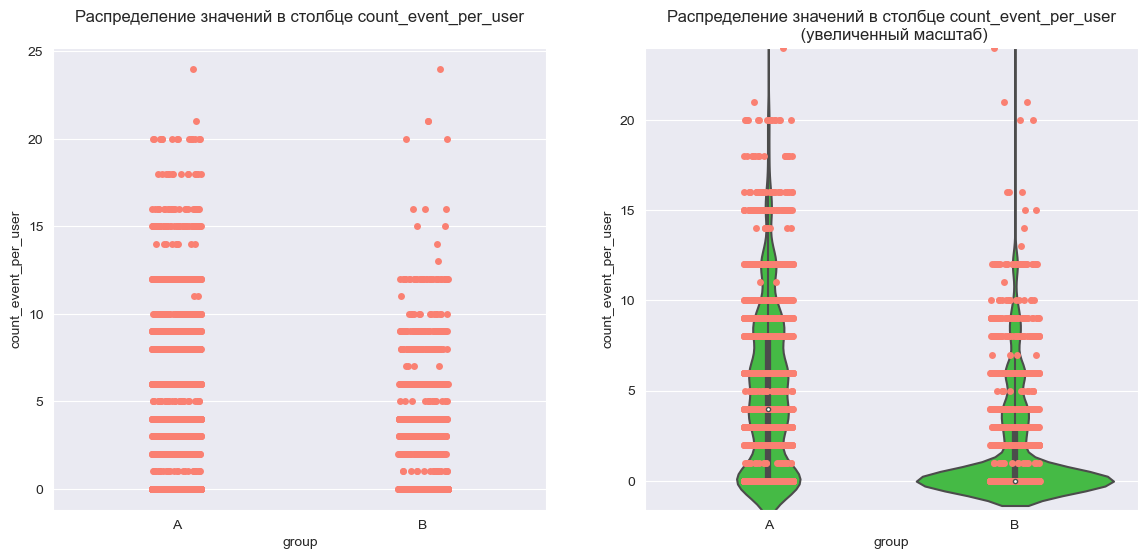

In [29]:
# готовим данные
df = (data.groupby(['user_id','group'])['event_name'].count().reset_index()
      .rename(columns={'event_name':'count_event_per_user'}))

# выводим распределение
describe_func(df,'count_event_per_user','group')

**Вывод:**
- В группе B есть сильный пик в нуле в событиях на пользователя относительно всех данных по группе
- Медианное и среднее количество событий на пользователя в группе B меньше, чем в группе A

Теперь посмотрим на распределения количество событий на пользователя по двум группам АБ-теста для пользователей, которые совершили хотя бы одно событие за период проведения теста.

count_event_per_user_A  count_event_per_user_B
count                       1939.00                  655.00
mean                           6.90                    5.41
std                            3.83                    3.27
min                            1.00                    1.00
25%                            4.00                    3.00
50%                            6.00                    4.00
75%                            9.00                    6.50
max                           24.00                   24.00
75%+1.5*IQR                   16.50                   11.75
25%-1.5*IQR                   -3.50                   -2.25

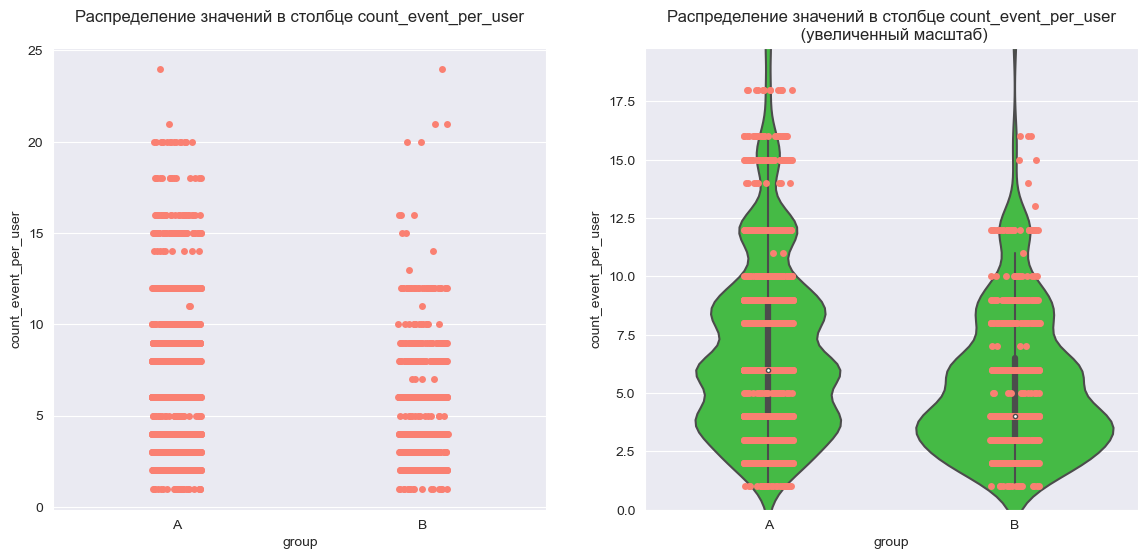

In [30]:
# готовим данные
df = data[~data['event_dt'].isna()]
df = (df.groupby(['user_id','group'])['event_name'].count().reset_index()
      .rename(columns={'event_name':'count_event_per_user'}))

# выводим распределение
describe_func(df,'count_event_per_user','group')

**Вывод:**
- Без пользователей, которые не совершали ни одного события после регистрации, распределения событий на пользователя между группами АБ-теста стало более индентично друг другу.
- Однако даже среди таких пользователей как медианное, так и среднее значение количества событий на пользователя у группы B меньше, чем у группы A.

Посмотрим как число событий в выборках распределено по дням.

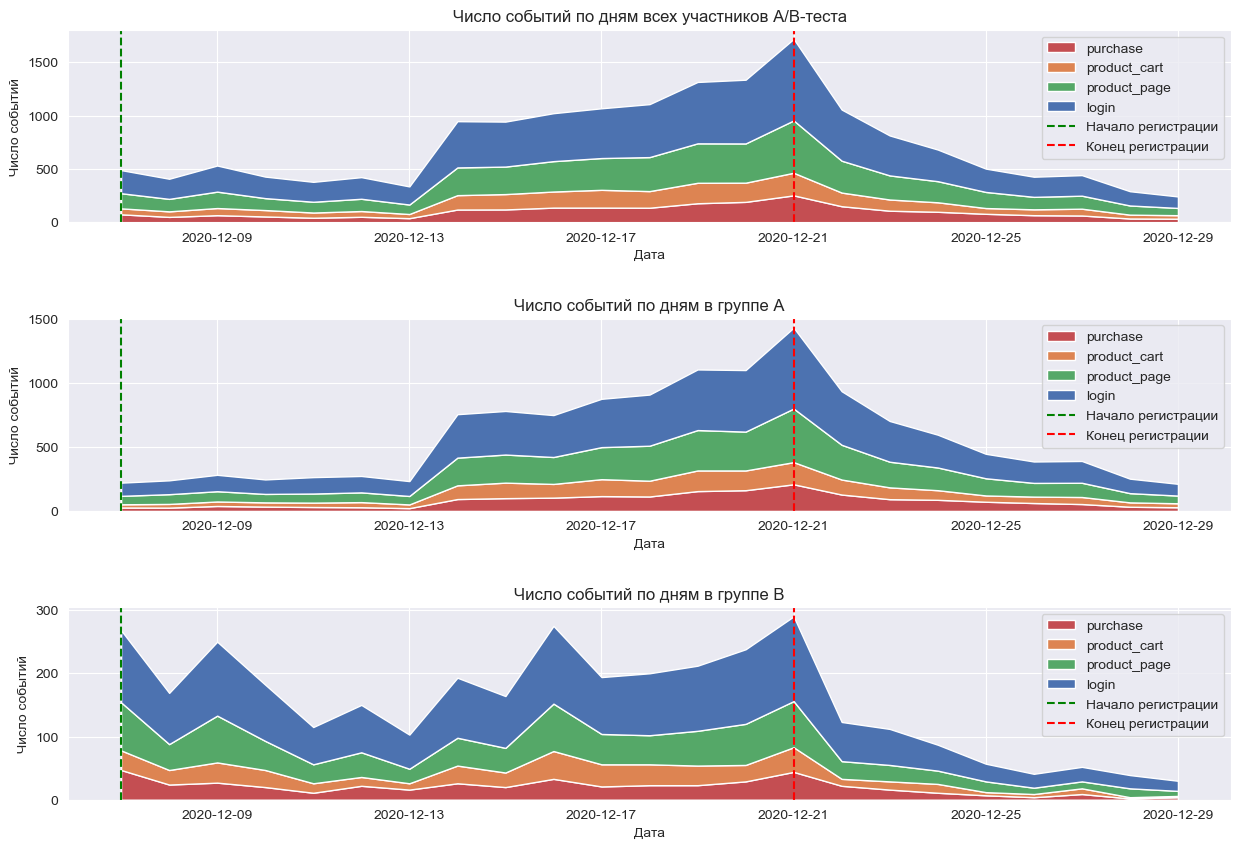

In [31]:
# задаем палитру
current_palette = sns.color_palette('deep')

# готовим данные
df1 = data.pivot_table(index = 'date_event', columns = 'event_name',
values = 'user_id', aggfunc = 'count').reset_index()
df2 = data[data['group'] == 'A'].pivot_table(index = 'date_event', columns = 'event_name',
values = 'user_id', aggfunc = 'count').reset_index()
df3 = data[data['group'] == 'B'].pivot_table(index = 'date_event', columns = 'event_name',
values = 'user_id', aggfunc = 'count').reset_index()

# задаем подложку
plt.figure(figsize=(15, 10))

# строим первый график
ax1 = plt.subplot(3, 1, 1)
ax1.stackplot(df1['date_event'],
              df1['purchase'],
              df1['product_cart'],
              df1['product_page'],
              df1['login'],
              labels=['purchase','product_cart','product_page','login'],
              colors=[current_palette[3],
                      current_palette[1],
                      current_palette[2],
                      current_palette[0]])
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green', linestyle='--',
            label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red', linestyle='--',
            label='Конец регистрации')
plt.title('Число событий по дням всех участников А/B-теста')
plt.ylabel('Число событий')
plt.xlabel('Дата')
plt.legend()

# строим второй график
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax2.stackplot(df2['date_event'],
              df2['purchase'],
              df2['product_cart'],
              df2['product_page'],
              df2['login'],
              labels=['purchase','product_cart','product_page','login'],
              colors=[current_palette[3],
                      current_palette[1],
                      current_palette[2],
                      current_palette[0]])
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green',
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red',
            linestyle='--', label='Конец регистрации')
plt.title('Число событий по дням в группе А')
plt.ylabel('Число событий')
plt.xlabel('Дата')
plt.legend()

# строим третий график
ax3 = plt.subplot(3, 1, 3, sharex=ax1)
ax3.stackplot(df3['date_event'],
              df3['purchase'],
              df3['product_cart'],
              df3['product_page'],
              df3['login'],
              labels=['purchase','product_cart','product_page','login'],
              colors=[current_palette[3],
                      current_palette[1],
                      current_palette[2],
                      current_palette[0]])
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green',
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red',
            linestyle='--', label='Конец регистрации')
plt.title('Число событий по дням в группе В')
plt.ylabel('Число событий')
plt.xlabel('Дата')
plt.legend()

# выводим графики
plt.subplots_adjust(hspace = 0.5)
plt.show();

**Выводы:**
- После окончания дня регистрации число событий стало падать у обеих групп. Скорее всего, это связано с прекращением набора новых пользователей: события после 21 числа совершают только набранные до 21 числа пользователи (проверим далее)
- Количество событий у группы А после 13 числа стало сильно расти. Скорее всего это связано с ростом числа регистраций (проверим далее)

Посмотрим на число событий по дням регистрации пользователей.

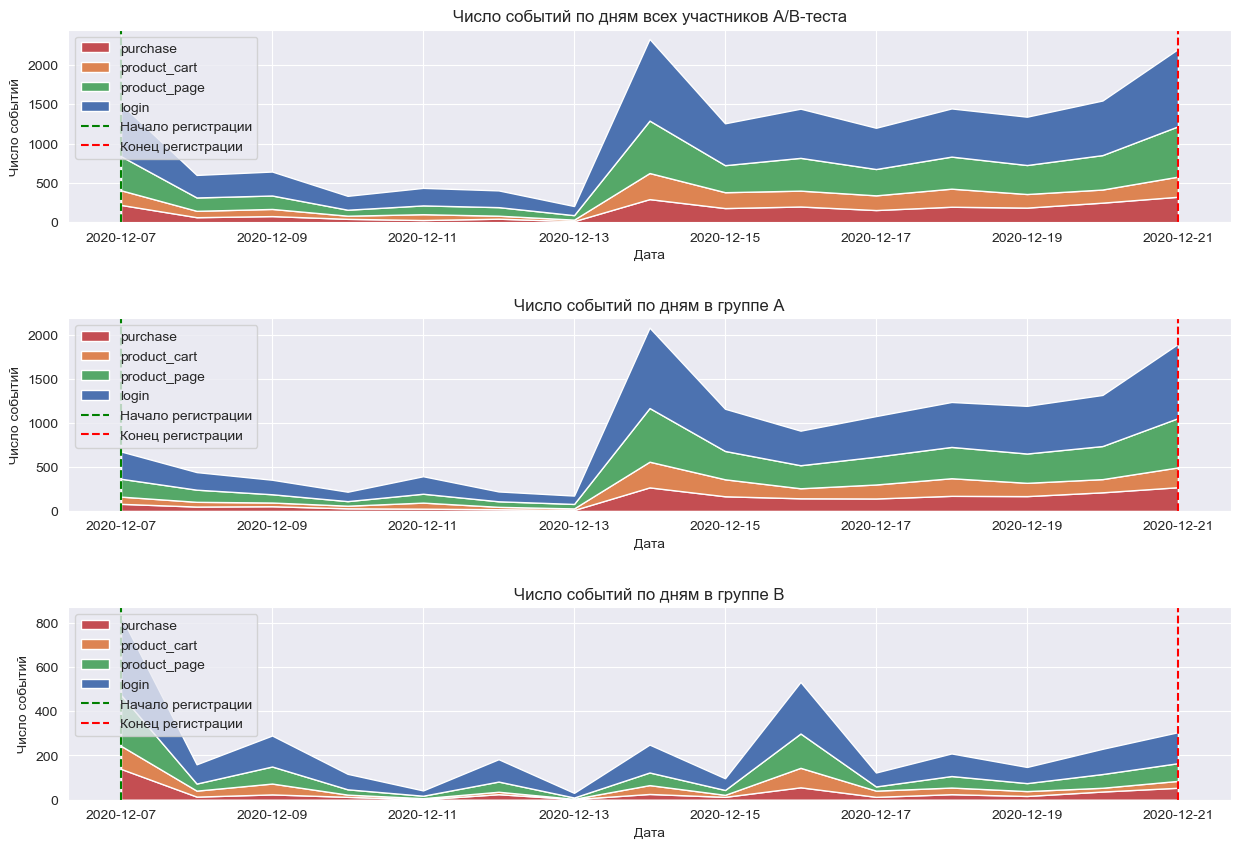

In [32]:
# задаем палитру
current_palette = sns.color_palette('deep')

# готовим данные
df1 = data.pivot_table(index = 'date_reg', columns = 'event_name',
values = 'user_id', aggfunc = 'count').reset_index()
df2 = data[data['group'] == 'A'].pivot_table(index = 'date_reg', columns = 'event_name',
values = 'user_id', aggfunc = 'count').reset_index()
df3 = data[data['group'] == 'B'].pivot_table(index = 'date_reg', columns = 'event_name',
values = 'user_id', aggfunc = 'count').reset_index()

# задаем подложку
plt.figure(figsize=(15, 10))

# строим первый график
ax1 = plt.subplot(3, 1, 1)
ax1.stackplot(df1['date_reg'],
              df1['purchase'],
              df1['product_cart'],
              df1['product_page'],
              df1['login'],
              labels=['purchase','product_cart','product_page','login'],
              colors=[current_palette[3],
                      current_palette[1],
                      current_palette[2],
                      current_palette[0]])
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green',
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red',
            linestyle='--', label='Конец регистрации')
plt.title('Число событий по дням всех участников А/B-теста')
plt.ylabel('Число событий')
plt.xlabel('Дата')
plt.legend(loc = 'upper left')

# строим второй график
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax2.stackplot(df2['date_reg'],
              df2['purchase'],
              df2['product_cart'],
              df2['product_page'],
              df2['login'],
              labels=['purchase','product_cart','product_page','login'],
              colors=[current_palette[3],
                      current_palette[1],
                      current_palette[2],
                      current_palette[0]])
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green',
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red',
            linestyle='--', label='Конец регистрации')
plt.title('Число событий по дням в группе А')
plt.ylabel('Число событий')
plt.xlabel('Дата')
plt.legend(loc = 'upper left')

# строим третий график
ax3 = plt.subplot(3, 1, 3, sharex=ax1)
ax3.stackplot(df3['date_reg'],
              df3['purchase'],
              df3['product_cart'],
              df3['product_page'],
              df3['login'],
              labels=['purchase','product_cart','product_page','login'],
              colors=[current_palette[3],
                      current_palette[1],
                      current_palette[2],
                      current_palette[0]])
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green',
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red',
            linestyle='--', label='Конец регистрации')
plt.title('Число событий по дням в группе В')
plt.ylabel('Число событий')
plt.xlabel('Дата')
plt.legend(loc = 'upper left')

# выводим графики
plt.subplots_adjust(hspace = 0.5)
plt.show();

**Вывод:**
- В группе А больше всего событий совершили пользователи, регистрировавшиеся после 13 декабря. Событий от пользователей, регистрировавшихся до 13 декабря мало. Возможно, это опять же связано со всплеском регистраций после 13 декабря (проверим это далее)
- В группе B больше всего событий совершили пользователи, зарегистрировавшиеся 7 и 16 декабря.

Посмотрим на число событий по дням суммарно в разбивке по группам АБ-теста. Также посмотрим на число регистраций по дням.

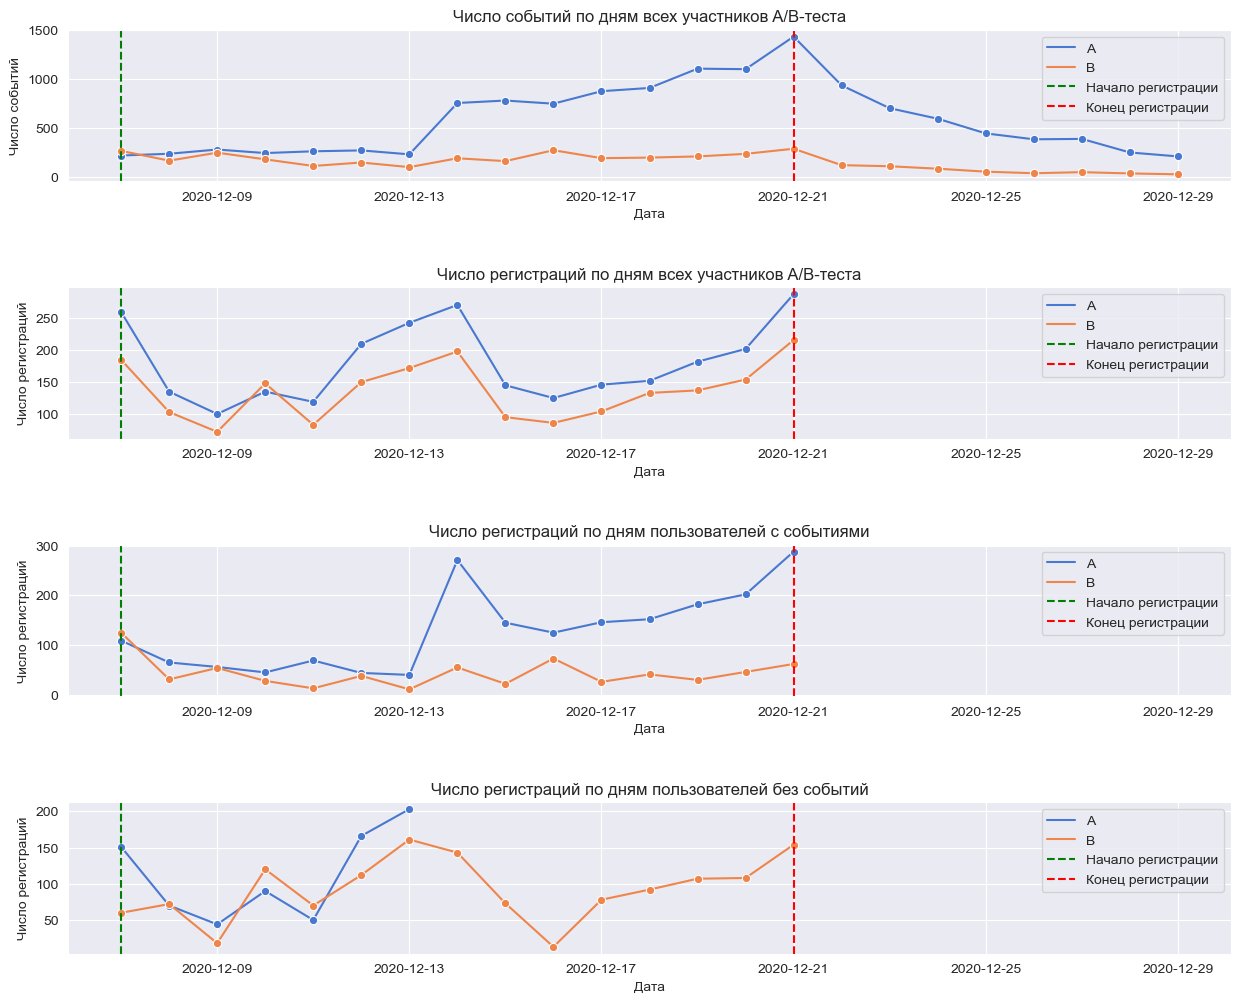

In [33]:
# задаем палитру
sns.set_palette("muted")

# готовим данные
df1 = data.groupby(['date_event','group'])['event_name'].count().reset_index()
df2 = data.groupby(['date_reg','group'])['user_id'].nunique().reset_index()
df3 = (data[~data['event_name'].isna()]
       .groupby(['date_reg','group'])['user_id'].nunique().reset_index())
df4 = (data[data['event_name'].isna()]
       .groupby(['date_reg','group'])['user_id'].nunique().reset_index())

# задаем подложку
plt.figure(figsize=(15, 12))

# строим первый график
ax1 = plt.subplot(4, 1, 1)
ax1 = sns.lineplot(data = df1, x='date_event', y='event_name',
                   hue='group',marker='o')
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green', 
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red', 
            linestyle='--', label='Конец регистрации')
plt.title('Число событий по дням всех участников A/B-теста')
plt.ylabel('Число событий')
plt.xlabel('Дата')
plt.legend()

# строим второй график
ax2 = plt.subplot(4, 1, 2, sharex = ax1)
ax2 = sns.lineplot(data = df2, x='date_reg', y='user_id', 
                   hue='group',marker='o')
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green', 
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red', 
            linestyle='--', label='Конец регистрации')
plt.title('Число регистраций по дням всех участников A/B-теста')
plt.ylabel('Число регистраций')
plt.xlabel('Дата')
plt.legend()

# строим третий график
ax3 = plt.subplot(4, 1, 3, sharex = ax1)
ax3 = sns.lineplot(data = df3, x='date_reg', y='user_id', 
                   hue='group',marker='o')
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green', 
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red', 
            linestyle='--', label='Конец регистрации')
plt.title('Число регистраций по дням пользователей с событиями')
plt.ylabel('Число регистраций')
plt.xlabel('Дата')
plt.legend()

# строим четвертый график
ax4 = plt.subplot(4, 1, 4, sharex = ax1)
ax4 = sns.lineplot(data = df4, x='date_reg', y='user_id', 
                   hue='group',marker='o')
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green',
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red', 
            linestyle='--', label='Конец регистрации')
plt.title('Число регистраций по дням пользователей без событий')
plt.ylabel('Число регистраций')
plt.xlabel('Дата')
plt.legend()

# выводим графики
plt.subplots_adjust(hspace = 0.7)
plt.show();

**Вывод:**
- Предположения подтвердились. Увеличение числа событий после 13 декабря в группе А связано с увеличением числа регистраций.
- Найдена интересная особенность: после 13 числа в группу А не попало ни одного пользователя, который бы не совершал события. В группе B такие пользователи набирались на всем протяжении периода регистрации.

Посмотрим характерное время конверсии пользователей в различные события воронки, то есть сколько времени проходит с момента регистрации до первого события по разным шагам воронки.

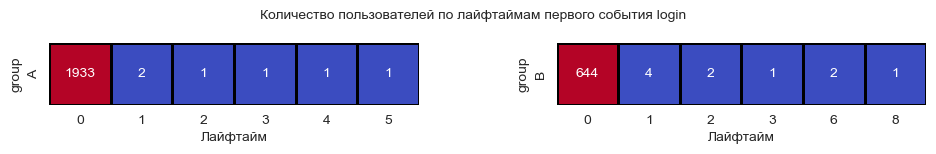

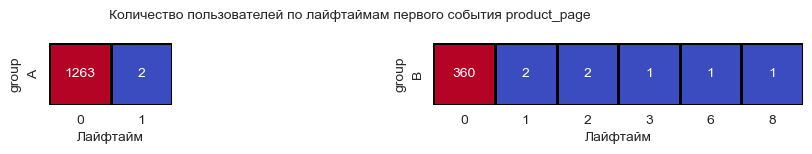

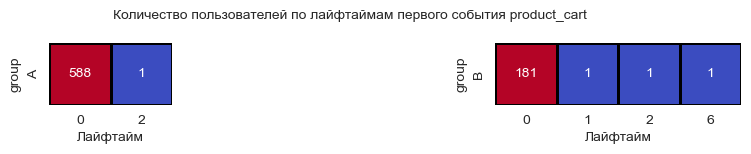

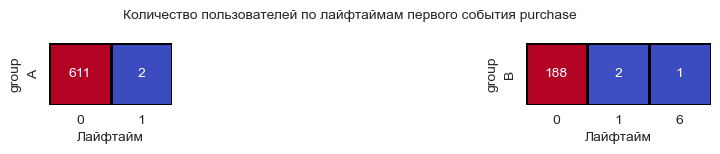

In [34]:
# задаем функцию подсчета лайфтаймов первых событий

def lifetime_event (event_name):    

    # задаем подложку и заголовок
    plt.figure(figsize=(12, 0.8))
    plt.suptitle('Количество пользователей по лайфтаймам'
                 ' первого события {}'.format(event_name),y=1.3, fontsize=10)

    # готовим данные для первого графика
    df = data.copy()
    df = df[df['group'] == 'A']
    df = (df[df['event_name'] == event_name]
          .sort_values(by=['user_id', 'event_dt','group'])
            .groupby(['user_id','date_reg','group'])
            .agg({'event_dt': 'first'})
            .reset_index())
    df['event_dt'] = df['event_dt'].dt.date
    
    df['lifetime_first_event'] = (pd.to_datetime(df['event_dt']) 
                                  - df['date_reg']).dt.days
    df = (df.groupby(['group','lifetime_first_event'])
          .size().reset_index().rename(columns={0: 'count_users'}))
    df = df.pivot('group', 'lifetime_first_event', 'count_users')
    
    # строим первый график
    ax1 = plt.subplot(1, 2, 1)
    ax1 = sns.heatmap(df, annot=True, fmt='.0f',cmap= 'coolwarm',
                      linecolor='black',linewidths=1, cbar=False,square=True)
    ax1.set_xlabel('Лайфтайм')
    
    # готовим данные для второго графика
    df = data.copy()
    df = df[df['group'] == 'B']
    df = (df[df['event_name'] == event_name]
          .sort_values(by=['user_id', 'event_dt','group'])
            .groupby(['user_id','date_reg','group'])
            .agg({'event_dt': 'first'})
            .reset_index())
    df['event_dt'] = df['event_dt'].dt.date
    df['lifetime_first_event'] = (pd.to_datetime(df['event_dt']) 
                                  - df['date_reg']).dt.days
    df = (df.groupby(['group','lifetime_first_event'])
          .size().reset_index().rename(columns={0: 'count_users'}))
    df = df.pivot('group', 'lifetime_first_event', 'count_users')
    
    # строим второй график
    ax2 = plt.subplot(1, 2, 2)
    ax2 = sns.heatmap(df, annot=True, fmt='.0f',cmap= 'coolwarm',
                      linecolor='black',linewidths=1, cbar=False,square=True)
    ax2.set_xlabel('Лайфтайм')

    # выводим оба графика
    plt.show();
    
# смотрим на лайфтаймы первых событий по каждому шагу воронки    
lifetime_event('login')
lifetime_event('product_page')
lifetime_event('product_cart')
lifetime_event('purchase')

**Вывод:**
- Практически все пользователи проходят все шаги воронки уже в день регистрации
- Так как маркетинговая кампания, наложившаяся на наш АБ-тест начинается 24 декабря, а последний день регистрации пользователей приходится на 21 декабря, то беспокоится о том, что маркетинговая кампания существенно исказит результаты теста не стоит: ведь почти все пользователи, которые хотели сделать покупки, к 24 декабря успеют конвертироваться по воронке.
- По этой же причине отклонение от ТЗ и остановка теста 29 декабря, а не 4 января практически никак не повлияет на результаты теста: почти все зарегистрировавшиеся с 7 по 21 декабря пользователи, совершавшие события, успеют конвертироваться по воронке.

Посмотрим на характерное время жизни пользователей, которые совершаются события.

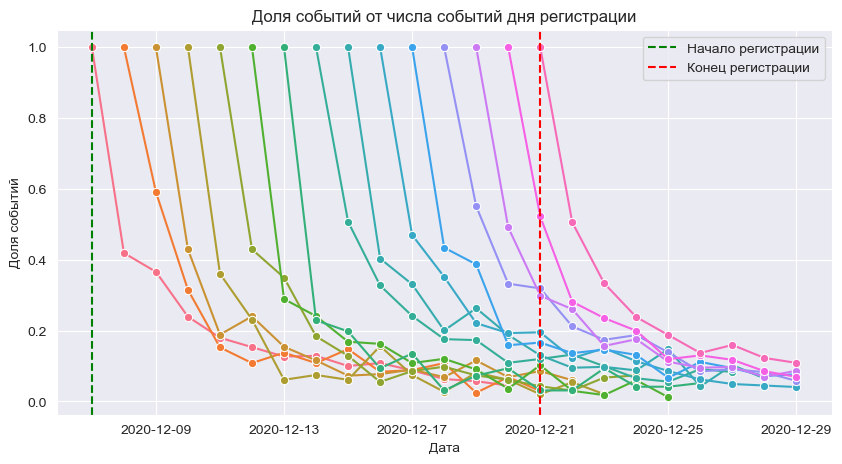

In [35]:
# готовим данные

df = data.groupby(['date_event','date_reg'])['event_name'].count().reset_index()

def get_event_name_if_matched(row):
    if row['date_event'] == row['date_reg']:
        return row['event_name']
    else:
        return float('NaN')
    
df = df.sort_values(by=['date_reg','date_event'])
df['event_first_day'] = df.apply(get_event_name_if_matched, axis=1)
df['event_first_day'] = df['event_first_day'].fillna(method='ffill')
df['perc_first_day'] = df['event_name'] / df['event_first_day']

# строим график

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data = df, x='date_event', y='perc_first_day',
                   marker='o',hue='date_reg',legend=False)
plt.axvline(x=pd.to_datetime('2020-12-07'), color='green', 
            linestyle='--', label='Начало регистрации')
plt.axvline(x=pd.to_datetime('2020-12-21'), color='red', 
            linestyle='--', label='Конец регистрации')
plt.title('Доля событий от числа событий дня регистрации')
plt.ylabel('Доля событий')
plt.xlabel('Дата')
plt.legend()

plt.show();

**Вывод:**
- Интерес пользователей совершать события выше всего в день регистрации, после чего интерес постепенно спадает
- Характерное время жизни пользователей в 14 дней подобрано в ТЗ скорее удачно. Примерно за это время пользователи совершают подавляющую часть всех событий. Однако для нашего исследования горизонт в 14 дней почти не играет никакой роли, так как все события воронки почти все пользователи, совершавшие события, проходят уже в день регистрации.

## Построение воронок и проверка гипотез

Цель нашего теста - это тестирование изменений, связанных с внедрением улучшенной рекомендательной системы. Пользователи, которые попали в наш тест, но не совершили ни одного события, не могут оценить изменения в рекомендательной системе. Поэтому в нашем тесте мы не будем учитывать пользователей без событий. В связи с этим за первый шаг воронки будет взят не факт регистрации, а событие `login`.

Создадим функцию для построения воронки.

In [36]:
# функция для создания датафреймов воронок событий

def funnel_group (df,              # датафрейм событий пользователей
                  column_id,       # столбец id пользователей   
                  column_event,    # столбец событий
                  column_group,    # столбец групп
                  group_1,         # первая группа
                  group_2,         # вторая группа
                  new_order=[],    # можно задать свой порядок шагов воронки
                  first_step=True  # должен ли войти первый шаг воронки
                  ):
    
    
    # считаем общее число уникальных пользователей в обеих группах
    all_0 = df[(df[column_group] == group_1) | 
               (df[column_group] == group_2)][column_id].nunique()
    
    # считаем общее число уникальных пользователей в первой группе
    all_1 = df[df[column_group] == group_1][column_id].nunique()
    
    # считаем общее число уникальных пользователей во второй группе
    all_2 = df[df[column_group] == group_2][column_id].nunique()
    
    # формируем воронку для пользователей из обеих групп
    buf = pd.DataFrame(data = [[all_0]], columns= [column_id], 
                       index = ['all_start'])
    df_all = pd.DataFrame((df.groupby(column_event)[column_id]
                          .nunique().sort_values(ascending=False)).head(4))
    df_all = pd.concat([buf, df_all])
    if len(new_order) > 0:
        order = list(['all_start']) + new_order
        df_all = df_all.reindex(order)
    df_all = df_all.rename(columns = {column_id: 'count_users'})
    df_all['conv_all'] = (df_all['count_users'] / all_0).round(4)
    df_all['conv_step'] =  (df_all['count_users'] / 
                            df_all['count_users'].shift(1)).round(4)
    if first_step==False:
        df_all = df_all[1:]
    df_funnel_all = df_all.fillna(0).reset_index().rename(
        columns = {'index':'funnel_step'})

    # формируем воронку для первой группы
    buf = pd.DataFrame(data = [[all_1]],columns = [column_id], 
                       index = ['all_start'])
    df_1 = pd.DataFrame((df[df[column_group] == group_1].
                         groupby(column_event)[column_id]
                          .nunique().sort_values(ascending=False)).head(4))
    df_1 =pd.concat([buf, df_1])
    if len(new_order) > 0:
        order = list(['all_start']) + new_order
        df_1 = df_1.reindex(order)
    df_1 = df_1.rename(columns={column_id: 'count_users'})
    df_1['conv_all'] = (df_1['count_users'] / all_1).round(4)
    df_1['conv_step'] =  (df_1['count_users'] 
                          / df_1['count_users'].shift(1)).round(4)
    if first_step==False:
        df_1 = df_1[1:]
    df_funnel_group_1 = df_1.fillna(0).reset_index().rename(
        columns = {'index':'funnel_step'})
    df_funnel_group_1[column_group] = group_1

    # формируем воронку для второй группы
    buf = pd.DataFrame(data = [[all_2]], columns = [column_id], 
                       index=['all_start'])
    df_2 = pd.DataFrame((df[df[column_group] == group_2]
                         .groupby(column_event)[column_id]
                          .nunique().sort_values(ascending=False)).head(4))
    df_2 = pd.concat([buf, df_2])
    if len(new_order) > 0:
        order = list(['all_start']) + new_order
        df_2 = df_2.reindex(order)
    df_2 = df_2.rename(columns = {column_id: 'count_users'})
    df_2['conv_all'] = (df_2['count_users'] / all_2).round(4)
    df_2['conv_step'] =  (df_2['count_users']/df_2['count_users']
                          .shift(1)).round(4)
    if first_step==False:
        df_2 = df_2[1:]
    df_funnel_group_2 = df_2.fillna(0).reset_index().rename(
        columns = {'index':'funnel_step'})
    df_funnel_group_2[column_group] = group_2

    # объединяем воронки двух групп в одну таблицу
    df_funnel_two_group = pd.concat([df_funnel_group_1, 
                                     df_funnel_group_2])

    return (df_funnel_all,         # воронка пользователей суммарно с обеих групп
            df_funnel_group_1,     # воронка пользователей с первой группы
            df_funnel_group_2,     # воронка пользователей со второй группы
            df_funnel_two_group    # воронки пользователей с обеих групп в разбивке по группе
           )

Создаем воронки.

In [37]:
# создаем датафреймы с воронками
(df_funnel_all, 
 df_funnel_group_1, 
 df_funnel_group_2, 
 df_funnel_two_group) = funnel_group(df = data[~data['event_name'].isna()],
                                     column_id ='user_id',
                                     column_event = 'event_name',
                                     column_group = 'group',
                                     group_1 = 'A',
                                     group_2 = 'B',
                                     new_order = ['login', 
                                                  'product_page', 
                                                  'product_cart', 
                                                  'purchase'],
                                     first_step = False)

Создадим функцию для визуализации воронки.

In [38]:
# функция для построения графика воронки

def funnel_plot(df,                  # подготовленный датафрейм воронки
                column_funnel_step,  # столбец с шагами воронки
                column_count_users,  # столбец с числом пользователей
                title                # заголовок графика
                ):
    
    # задаем названия для каждой стадии воронки
    stages = df[column_funnel_step]
    
    # задаем количество пользователей для каждой стадии воронки
    values = df[column_count_users]

    # создаем объект для построения воронки
    fig = go.Figure(go.Funnel(
        y = stages,
        x = values,
        textinfo = "value+percent initial",
        marker = {"color": ['#d9f0a3', '#addd8e', '#78c679', 
                            '#41ab5d', '#238443', '#006837', 
                            '#004529', '#00241b', '#000d0a']}))

    # настраиваем макет и отображение графика
    fig.update_layout(
        title = {'text': "Воронка событий для " + title,'x': 0.55},
        width = 800,
        height = 600,
        margin = {"l": 1, "r": 1, "t": 100, "b": 100},
        showlegend = False,
        plot_bgcolor='#FFFFFF')

    # отображаем график
    fig.show()

Выводим воронку событий для пользователей группы A.

In [39]:
# строим воронку
funnel_plot(df = df_funnel_group_1,
            column_funnel_step = 'funnel_step',
            column_count_users = 'count_users',
            title = 'пользователей группы А')

**Вывод:**
- Похоже, пользователи могут делать покупки в обход корзины: конверсия в покупку выше, чем конверсия в корзину.
- Больше всего пользователей теряется на шаге воронки с карточки товара в просмотр корзины

Выводим воронку событий для пользователей группы B.

In [40]:
# строим воронку
funnel_plot(df = df_funnel_group_2,
            column_funnel_step = 'funnel_step',
            column_count_users = 'count_users',
            title = 'пользователей группы B')

**Вывод:**
- По всем шагам воронки группа B хуже по конверсии группы А

Для того, чтобы проверить статистически значима ли разница между конверсиями воронок, проведем z-тест на равенство долей.

Перед проведением z-теста необходимо оценить достаточно ли у нас набрано пользователей для того, чтобы уловить разницу в конверсиях в 10 процентов по каждому шагу воронки, указанному в ТЗ.

Посчитаем сколько нужно пользователей для АБ-теста калькулятором: https://www.evanmiller.org/ab-testing/sample-size.html 

Параметры:
- Базовый коэффициент конверсии: 65% (максимальная конверсия из шагов воронки контрольной группы A)
- Мощность теста: 80% (по умолчанию)
- Стат. значимость: 5% (по умолчанию)
- Минимальный эффект: 10% (задан в ТЗ)

**Результат:**  
- Необходимо минимум 362 пользователя в каждой из выборок. В наших выборках их гораздо больше. То есть мы сможем уловить разницу в 10%. Однако стоит отметить, что набрано нецелесообразно гораздо больше пользователей, чем необходимо. В группе B набрано почти в два раза больше пользователей, в группе A — более чем в пять раз.
- В связи с этим отклонение от ТЗ в 6000 пользователей для двух групп не является существенным и может быть проигнорировано.

Создадим функцию для проверки статистически значимой разницы в конверсиях двух групп

In [41]:
def test_conv(all1,all2,part1,part2,alpha):
   
    # задаем доли
    successes = np.array([part1, part2])
    
    # задаем исходное количество
    trials = np.array([all1, all2])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = ((successes[0] + successes[1]) 
                  / (trials[0] + trials[1]))

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = (difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1])))

    # задаем стандартное нормальное распределение
    distr = st.norm(0, 1)

    # cчитаем какова вероятность получить такое различие или больше
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    # выводим p-значение
    print('\033[1mp_value: {}\033[0m'.format(p_value))
    
    # принимаем решение
    if p_value < alpha:
        print('\033[1mОтвергаем нулевую гипотезу: '
              'между долями есть значимая разница\033[0m\n')
    else:
        print(
            '\033[1mНе получилось отвергнуть нулевую гипотезу, '
            'нет оснований считать доли разными\033[0m\n')


Создадим функцию проверки статистически значимой разницы между конверсиями на каждом шаге воронки с возможностью задать поправку на множественные сравнения

In [42]:
# функция для стат. теста

def test_two_group(df,                     # подготовленный датафрейм с воронкой по двум группам
                  column_group,            # столбец с группами
                  column_count_users,      # столбец с числом пользователей
                  column_funnel_step,      # столбец с шагами воронки
                  furst_step,              # имя первого шага воронки
                  group_1,                 # имя первой группы
                  group_2,                 # имя второй группы
                  alpha,                   # уровень стат. значимости
                  n                        # поправка на множественные сравнения
                  ):

    # вносим поправку на множественные сравнения
    alpha_n = alpha / n

    # берем полное количество пользователей первой группы
    print(column_count_users)
    all1=(df[((df[column_group] == group_1) 
                              & (df[column_funnel_step] == furst_step))].reset_index()
          .loc[0,column_count_users])
    # выводим полное количество пользователей первой группы
    print('all of group_{} = {}'.format(group_1,all1))

    # берем полное количество пользователей второй группы
    all2=(df[((df[column_group] == group_2) 
                              & (df[column_funnel_step] == furst_step))].reset_index()
          .loc[0,column_count_users])
    # выводим полное количество пользователей второй группы
    print('all of group_{} = {}'.format(group_2,all2))

    print('')
    
    # проходимся по каждому шагу воронки, кроме стартового
    for funnel_step in (
        df.groupby(column_funnel_step)[column_count_users].sum()
        .sort_values(ascending=False).index[1:]):
        
        # выводим шаг воронки
        print('event: {}'.format(funnel_step))

        # берем количество пользователей шага воронки из первой группы
        part1=(df[(df[column_group] == group_1) 
                              & (df[column_funnel_step] == funnel_step)].reset_index()
          .loc[0,column_count_users]
         )
        # выводим количество пользователей и конверсию шага воронки первой группы   
        print('part of group_{} = {}'.format(group_1,part1))
        print('conv of group_{} = {:.2%}'.format(group_1,part1/all1))

        # берем количество пользователей шага воронки из второй группы
        part2=(df[(df[column_group] == group_2) 
                              & (df[column_funnel_step] == funnel_step)].reset_index()
          .loc[0,column_count_users]
         )
        # выводим количество пользователей и конверсию шага воронки второй группы
        print('part of group_{} = {}'.format(group_2,part2))
        print('conv of group_{} = {:.2%}'.format(group_2,part2/all2))
        
        # выводим уровень стат. значимости и разницу в конверсиях
        print('alpha =',alpha_n)
        print('\033[1mdifference: {:.2%} \033[0m'.format(part2/all2-part1/all1))
        
        # проводим стат. тест и выводим результаты
        test_conv(all1,all2,part1,part2,alpha_n)

Проверяем гипотезы.

Так как у нас множественная проверка, нужно внести поправку на множественные сравнения. При сравнении воронок используем поправку Бенферрони и разделим заданный уровень стат. значимости на количество сравнений: у нас три шага воронки, то есть три сравнения.

Для каждого из таких сравнений выдвинуты следующие нулевая и альтернативная гипотезы:
    
**Нулевая гипотеза H0:** Различия в конверсии на данном шаге воронки между группами нет  
**Альтернативная гипотеза H1:** Различие в конверсии на данном шаге воронки между группами есть

In [43]:
# запускаем стат. тест
test_two_group(df = df_funnel_two_group,
               column_group = 'group',
               column_count_users = 'count_users',
               column_funnel_step = 'funnel_step',
               furst_step = 'login',
               group_1 ='A',
               group_2 ='B',
               alpha = .05,
               n = 3)

count_users
all of group_A = 1939
all of group_B = 654

event: product_page
part of group_A = 1265
conv of group_A = 65.24%
part of group_B = 367
conv of group_B = 56.12%
alpha = 0.016666666666666666
difference: -9.12% 
p_value: 2.9463911899618722e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница

event: purchase
part of group_A = 613
conv of group_A = 31.61%
part of group_B = 191
conv of group_B = 29.20%
alpha = 0.016666666666666666
difference: -2.41% 
p_value: 0.24933015751802245
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

event: product_cart
part of group_A = 589
conv of group_A = 30.38%
part of group_B = 184
conv of group_B = 28.13%
alpha = 0.016666666666666666
difference: -2.24% 
p_value: 0.2784249853300258
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



**Выводы:**
- Конверсия в карточки товаров статистически значимо хуже в группе B, чем в группе A. Абсолютная разница составила 9.12%
- Конверсии в корзину и покупки между группами A и B статистически значимо не отличаются.

## Выводы и рекомендации

**В ходе исследования выполнено**:
- Данные предобработаны и проверены по ТЗ
- Поведен исследовательский анализ данных
- Построены конверсионные воронки
- Проверены стат. гипотезы


**Итоговые выводы по исследованию**:
- **АБ-тест не успешен**. По конверсии в корзину и покупки две группы теста не отличаются. По конверсии в карточки товаров группа B хуже группы А на 9.12%
- Почти все участники АБ-теста либо проходят все шаги воронки в день регистрации, либо не совершают ни одного события за период проведения теста.
- Для АБ-теста набрано больше пользователей, чем минимально необходимо для достоверного анализа. В группе B набрано почти в два раза больше пользователей, в группе A — более чем в пять раз.
- Найдена интересная особенность: c 13 по 21 декабря в группу А не попало ни одного пользователя, который бы не совершал события. В то время как в группу B такие пользователи набирались на всем протяжении периода регистрации.

**Выводы о соответствии данных ТЗ:**

- Дата остановки набора новых пользователей по ТЗ: 2020-12-21
- Дата остановки набора новых пользователей по данным: 2020-12-21  (соответсвует ТЗ)


- Дата запуска теста по ТЗ: 2020-12-07
- Дата запуска теста по данным: 2020-12-07 (соответсвует ТЗ)


- Дата остановки теста по ТЗ: 2021-01-04
- Дата окончания теста по данным: 2020-12-29 (отклонение от ТЗ)
- **Причина отклонения**: отсутствие данных за полный период проведения теста
- **Критичность отклонения**: не критично, так как пользователи успевают совершить ключевые события, влияющие на результаты теста, до даты окончания теста


- Аудитория по ТЗ: 15% новых пользователей из региона EU
- Аудитория по данным: 11% новых пользователей из региона EU (отклонение от ТЗ)
- **Причина отклонения**: очистка данных от пользователей из конкурирующего теста
- **Критичность отклонения**: не критично, так как размеры набранных выборок превышают минимальный размер выборки для оценки генеральной совокупности пользователей из Европы


- Ожидаемое количество участников теста по ТЗ: 6000
- Реальное количество участников теста по данным: 4749 (отклонение от ТЗ)
- **Причина отклонения**: очистка данных от пользователей из конкурирующего теста и пользователей не из Европы
- **Критичность отклонения**: не критично, так как размеры выборок превышают минимальный размер выборки для расчета статистически значимой разницы между конверсиями по каждому из шагов воронки


- Ожидаемое наложение маркетинговых активностей: нет
- Реальное наложение маркетинговых активностей: есть (отклонение от ТЗ)
- **Причина отклонения**: выбранный период проведения теста
- **Критичность отклонения**: не критично, так как пользователи успевают совершить ключевые события, влияющие на результаты теста, до начала маркетинговой активности


**Рекомендации**:
- Не внедрять новую рекомендательную систему